#Clean the dataset by handling missing values

##read the dataset and standardize all prices to a common currency(USD)

In [8]:
import pandas as pd
import numpy as np

# Load the dataset
cars_data = pd.read_csv('/content/drive/MyDrive/cars.csv')

# Updated currency conversion rates to USD
currency_conversion = {
    "SAR": 0.27,  # 1 SAR = 0.27 USD
    "KWD": 3.26,  # 1 KWD = 3.26 USD
    "USD": 1.0,   # 1 USD = 1.0 USD
    "AED": 0.27,  # 1 AED = 0.27 USD
    "EGP": 0.032, # 1 EGP = 0.032 USD
    "BHD": 2.65,  # 1 BHD = 2.65 USD
    "QAR": 0.27,  # 1 QAR = 0.27 USD
    "OMR": 2.60   # 1 OMR = 2.60 USD
}

# Function to extract and convert price to USD
def convert_price_to_usd(price_str):
    try:
        for currency, rate in currency_conversion.items():
            if currency in price_str:
                # Extract numeric value and convert
                value = float(price_str.replace(currency, "").replace(",", "").strip())
                return value * rate
        return np.nan  # Return NaN if no recognized currency
    except Exception:
        return np.nan  # Handle unexpected formats gracefully

# Apply the conversion function to the price column
cars_data['price_usd'] = cars_data['price'].apply(convert_price_to_usd)

# Convert non-unique values in 'price_usd' to NaN
cars_data['price_usd'] = cars_data['price_usd'].mask(cars_data['price_usd'].duplicated(keep=False))

# Drop the original 'price' column and rename 'price_usd' to 'price'
cars_data_cleaned = cars_data.drop(columns=['price']).rename(columns={'price_usd': 'price'})

##convert some of object column to numarical column

In [9]:

# Clean the dataset further
cars_data_cleaned['engine_capacity'] = pd.to_numeric(cars_data_cleaned['engine_capacity'], errors='coerce')
cars_data_cleaned['cylinder'] = pd.to_numeric(cars_data_cleaned['cylinder'], errors='coerce')
cars_data_cleaned['horse_power'] = pd.to_numeric(cars_data_cleaned['horse_power'], errors='coerce')
cars_data_cleaned['top_speed'] = pd.to_numeric(cars_data_cleaned['top_speed'], errors='coerce')

#Clean 'seats' column
cars_data_cleaned['seats'] = cars_data_cleaned['seats'].replace(['N A', 'NA', 'na', 'n/a'], np.nan)
cars_data_cleaned['seats'] = cars_data_cleaned['seats'].str.extract('(\d+)', expand=False).astype(float)

##handle missing values by appling groupby and fill eith mode for car name then brand

In [10]:

# Updated function to handle groupby and mode filling without the warning
def fill_with_mode(group):
    for column in group.columns:
        mode_value = group[column].mode()
        if not mode_value.empty:
            group[column] = group[column].fillna(mode_value[0])
    return group

# Apply groupby and fill with mode for both 'car_name' and 'brand' columns
cars_data_cleaned = cars_data_cleaned.groupby('car name', group_keys=False).apply(fill_with_mode)
cars_data_cleaned = cars_data_cleaned.groupby('brand', group_keys=False).apply(fill_with_mode)

# Output results
print(f"Cleaned dataset shape: {cars_data_cleaned.shape}")
cars_data_cleaned.head()


<ipython-input-10-cad55bd67915>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cars_data_cleaned = cars_data_cleaned.groupby('car name', group_keys=False).apply(fill_with_mode)


Cleaned dataset shape: (6308, 9)


<ipython-input-10-cad55bd67915>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cars_data_cleaned = cars_data_cleaned.groupby('brand', group_keys=False).apply(fill_with_mode)


,car name,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country,price
0,Fiat 500e 2021 La Prima,0.0,4.0,100.0,182.0,150.0,fiat,ksa,21200.00
1,Peugeot Traveller 2021 L3 VIP,2.0,4.0,180.0,205.0,8.0,peugeot,ksa,37955.25
2,Suzuki Jimny 2021 1.5L Automatic,1.5,4.0,102.0,145.0,4.0,suzuki,ksa,26671.95
3,Ford Bronco 2021 2.3T Big Bend,2.3,4.0,420.0,160.0,7.0,ford,ksa,52135.65
4,Honda HR-V 2021 1.8 i-VTEC LX,1.8,4.0,140.0,190.0,5.0,honda,ksa,25740.45


##Drop the rows with missing values

In [11]:
cars_data_cleaned.dropna(inplace=True)
print(f"Number of rows befor handling errors and missing values: {cars_data.shape[0]}")
print(f"Number of rows after handling errors and missing values: {cars_data_cleaned.shape[0]}")


Number of rows befor handling errors and missing values: 6308
Number of rows after handling errors and missing values: 6250


##example for coverting and handle the missing values

In [12]:
# Filter the dataset for a specific brand
specific_car_name = 'fiat'
filtered_data = cars_data[cars_data['brand'] == specific_car_name]
# Display the filtered data
filtered_data.head()

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country,price_usd
0,Fiat 500e 2021 La Prima,TBD,0.0,"N/A, Electric",Single,Automatic,150,fiat,ksa,NaN
298,Fiat 500 2021 1.4L Hatch POP,"SAR 71,185",1.4,4,100,182,4 Seater,fiat,ksa,19219.95
336,Fiat 500X 2021 1.4T City Cross,"SAR 66,500",1.4,4,140,190,5 Seater,fiat,ksa,17955.00
357,Fiat 500 2021 Convertible 1.4L Pop,"SAR 82,685",1.4,NaN,100,182,4 Seater,fiat,ksa,22324.95
1008,Fiat 500e 2021 La Prima,TBD,Cylinders,Drive Type,Horsepower (bhp),Top Speed (Km/h),Seating Capacity,fiat,egypt,NaN


In [13]:
# Filter the dataset for a specific car name
specific_car_name = 'Fiat 500e 2021 La Prima'
filtered_data = cars_data[cars_data['car name'] == specific_car_name]

# Display the filtered data
filtered_data.head()


,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country,price_usd
0,Fiat 500e 2021 La Prima,TBD,0.0,"N/A, Electric",Single,Automatic,150,fiat,ksa,NaN
1008,Fiat 500e 2021 La Prima,TBD,Cylinders,Drive Type,Horsepower (bhp),Top Speed (Km/h),Seating Capacity,fiat,egypt,NaN
1394,Fiat 500e 2021 La Prima,TBD,0.0,"N/A, Electric",Single,Automatic,150,fiat,bahrain,NaN
2302,Fiat 500e 2021 La Prima,TBD,0.0,"N/A, Electric",Single,Automatic,150,fiat,qatar,NaN
3219,Fiat 500e 2021 La Prima,TBD,0.0,"N/A, Electric",Single,Automatic,150,fiat,oman,NaN


In [14]:
# Filter the dataset for a specific car name
specific_car_name = 'Fiat 500e 2021 La Prima'
filtered_data = cars_data_cleaned[cars_data_cleaned['car name'] == specific_car_name]

# Display the filtered data
filtered_data.head()


,car name,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country,price
0,Fiat 500e 2021 La Prima,0.0,4.0,100.0,182.0,150.0,fiat,ksa,21200.0
1008,Fiat 500e 2021 La Prima,0.0,4.0,100.0,182.0,150.0,fiat,egypt,21200.0
1394,Fiat 500e 2021 La Prima,0.0,4.0,100.0,182.0,150.0,fiat,bahrain,21200.0
2302,Fiat 500e 2021 La Prima,0.0,4.0,100.0,182.0,150.0,fiat,qatar,21200.0
3219,Fiat 500e 2021 La Prima,0.0,4.0,100.0,182.0,150.0,fiat,oman,21200.0


#encoding categorical features, normalizing and Standerize numarical features

##encode the categorical columns using label encoding method

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder and transform the 'car name' column
cars_data_cleaned['car_name_encoded'] = label_encoder.fit_transform(cars_data_cleaned['car name'])

# Fit the encoder and transform the 'country' column
cars_data_cleaned['country_encoded'] = label_encoder.fit_transform(cars_data_cleaned['country'])

# Fit the encoder and transform the 'brand' column
cars_data_cleaned['brand_encoded'] = label_encoder.fit_transform(cars_data_cleaned['brand'])

# Drop the original 'car name', 'country', and 'brand' columns all at once
df_oneHotencoded = cars_data_cleaned.drop(['car name', 'country', 'brand'], axis=1)

# Display the first few rows to confirm the encoding
df_oneHotencoded.head()



,engine_capacity,cylinder,horse_power,top_speed,seats,price,car_name_encoded,country_encoded,brand_encoded
0,0.0,4.0,100.0,182.0,150.0,21200.00,548,2,21
1,2.0,4.0,180.0,205.0,8.0,37955.25,1953,2,55
2,1.5,4.0,102.0,145.0,4.0,26671.95,2206,2,65
3,2.3,4.0,420.0,160.0,7.0,52135.65,558,2,22
4,1.8,4.0,140.0,190.0,5.0,25740.45,795,2,29


In [16]:

# To view the mapping of car names to integer labels
car_name_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Car name to label mapping:")
car_name_mapping


Car name to label mapping:


{'Foton': 0,
 'alfa-romeo': 1,
 'aston-martin': 2,
 'audi': 3,
 'baic': 4,
 'bentley': 5,
 'bestune': 6,
 'bmw': 7,
 'borgward': 8,
 'bugatti': 9,
 'byd': 10,
 'cadillac': 11,
 'changan': 12,
 'chery': 13,
 'chevrolet': 14,
 'chrysler': 15,
 'citroen': 16,
 'dfm': 17,
 'dodge': 18,
 'ds': 19,
 'ferrari': 20,
 'fiat': 21,
 'ford': 22,
 'gac': 23,
 'geely': 24,
 'genesis': 25,
 'gmc': 26,
 'great-wall': 27,
 'haval': 28,
 'honda': 29,
 'hongqi': 30,
 'hyundai': 31,
 'infiniti': 32,
 'isuzu': 33,
 'jac': 34,
 'jaguar': 35,
 'jeep': 36,
 'jetour': 37,
 'kia': 38,
 'kinglong': 39,
 'lamborghini': 40,
 'land-rover': 41,
 'lexus': 42,
 'lincoln': 43,
 'lotus': 44,
 'maserati': 45,
 'maxus': 46,
 'mazda': 47,
 'mclaren': 48,
 'mercedes-benz': 49,
 'mg': 50,
 'mini': 51,
 'mitsubishi': 52,
 'nissan': 53,
 'opel': 54,
 'peugeot': 55,
 'porsche': 56,
 'proton': 57,
 'ram': 58,
 'renault': 59,
 'rolls-royce': 60,
 'seat': 61,
 'skoda': 62,
 'ssang-yong': 63,
 'subaru': 64,
 'suzuki': 65,
 'tata': 

##Identify categorical and numerical columns first for normalization

In [17]:
#find categorical columns
categorical_columns = df_oneHotencoded.select_dtypes(include=['object']).columns
print(categorical_columns)

# Identify numerical columns first for normalization
numerical_columns = df_oneHotencoded.select_dtypes(include=['float64', 'int64']).columns

# Print the numerical column names
print(numerical_columns.tolist())

Index([], dtype='object')
['engine_capacity', 'cylinder', 'horse_power', 'top_speed', 'seats', 'price', 'car_name_encoded', 'country_encoded', 'brand_encoded']


##Normalize numarical coulmns

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()


# Apply MinMaxScaler to the numeric columns
df_oneHotencoded[numerical_columns] = scaler.fit_transform(df_oneHotencoded[numerical_columns])

# Display the first few rows to confirm the normalization
df_oneHotencoded.head()


,engine_capacity,cylinder,horse_power,top_speed,seats,price,car_name_encoded,country_encoded,brand_encoded
0,0.000000,0.076923,0.017467,0.091176,0.573643,0.004621,0.218762,0.333333,0.295775
1,0.000296,0.076923,0.033347,0.125000,0.023256,0.009288,0.779641,0.333333,0.774648
2,0.000222,0.076923,0.017864,0.036765,0.007752,0.006145,0.880639,0.333333,0.915493
3,0.000341,0.076923,0.080985,0.058824,0.019380,0.013237,0.222754,0.333333,0.309859
4,0.000267,0.076923,0.025407,0.102941,0.011628,0.005886,0.317365,0.333333,0.408451


##Standerize numarical features

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
df_oneHotencoded[numerical_columns] = scaler.fit_transform(df_oneHotencoded[numerical_columns])

# Display the first few rows to confirm the standardization
df_oneHotencoded.head()


,engine_capacity,cylinder,horse_power,top_speed,seats,price,car_name_encoded,country_encoded,brand_encoded
0,-0.231457,-0.710244,-1.070244,-0.845235,6.523206,-0.437432,-0.928564,-0.647444,-0.777183
1,-0.227787,-0.710244,-0.623176,-0.353877,0.019975,-0.275611,1.035795,-0.647444,0.905306
2,-0.228704,-0.710244,-1.059067,-1.635681,-0.163215,-0.384584,1.389520,-0.647444,1.400156
3,-0.227236,-0.710244,0.718028,-1.315230,-0.025822,-0.138657,-0.914583,-0.647444,-0.727698
4,-0.228154,-0.710244,-0.846710,-0.674328,-0.117417,-0.393580,-0.583228,-0.647444,-0.381304


#Building Regression Models

##split the data set into training,testing and validation sets

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming  `price` is the target column
X = df_oneHotencoded.drop(columns=['price'])
y = df_oneHotencoded['price']

# Split the dataset into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


##Linear Models

In [21]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test are already defined

# Initialize models
linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()

# Define a range of lambda values for Grid Search
alpha_range = [0.01, 0.1, 1, 10, 100]

# Grid Search for LASSO and Ridge Regression
param_grid = {'alpha': alpha_range}

# Lasso Regression
lasso_grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_grid_search.fit(X_train_scaled, y_train)

# Ridge Regression
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_grid_search.fit(X_train_scaled, y_train)

# Linear Regression (no regularization)
linear_model.fit(X_train_scaled, y_train)

# Displaying the best lambda for LASSO and Ridge
print(f"Best lambda for LASSO: {lasso_grid_search.best_params_['alpha']}")
print(f"Best lambda for Ridge: {ridge_grid_search.best_params_['alpha']}\n")

# Evaluating the models on the validation set
y_pred_lasso = lasso_grid_search.predict(X_val_scaled)
y_pred_ridge = ridge_grid_search.predict(X_val_scaled)
y_pred_linear = linear_model.predict(X_val_scaled)

# Compute Metrics for all models on the validation set
mse_lasso = mean_squared_error(y_val, y_pred_lasso)
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
mse_linear = mean_squared_error(y_val, y_pred_linear)

mae_lasso = mean_absolute_error(y_val, y_pred_lasso)
mae_ridge = mean_absolute_error(y_val, y_pred_ridge)
mae_linear = mean_absolute_error(y_val, y_pred_linear)

print(f"Validation Metrics:")
print(f"LASSO: MSE = {mse_lasso}, MAE = {mae_lasso}")
print(f"Ridge: MSE = {mse_ridge}, MAE = {mae_ridge}")
print(f"Linear Regression: MSE = {mse_linear}, MAE = {mae_linear}\n")

# Compute Metrics for all models on the test set
y_pred_lasso_test = lasso_grid_search.predict(X_test_scaled)
y_pred_ridge_test = ridge_grid_search.predict(X_test_scaled)
y_pred_linear_test = linear_model.predict(X_test_scaled)

mse_lasso_test = mean_squared_error(y_test, y_pred_lasso_test)
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge_test)
mse_linear_test = mean_squared_error(y_test, y_pred_linear_test)

mae_lasso_test = mean_absolute_error(y_test, y_pred_lasso_test)
mae_ridge_test = mean_absolute_error(y_test, y_pred_ridge_test)
mae_linear_test = mean_absolute_error(y_test, y_pred_linear_test)

print(f"Test Metrics:")
print(f"LASSO: MSE = {mse_lasso_test}, MAE = {mae_lasso_test}")
print(f"Ridge: MSE = {mse_ridge_test}, MAE = {mae_ridge_test}")
print(f"Linear Regression: MSE = {mse_linear_test}, MAE = {mae_linear_test}\n")

# Calculate R² scores for validation set
r2_lasso = r2_score(y_val, y_pred_lasso)
r2_ridge = r2_score(y_val, y_pred_ridge)
r2_linear = r2_score(y_val, y_pred_linear)

print(f"Validation R² Scores:")
print(f"LASSO: {r2_lasso}")
print(f"Ridge: {r2_ridge}")
print(f"Linear Regression: {r2_linear}\n")

# Calculate R² scores for test set
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)
r2_linear_test = r2_score(y_test, y_pred_linear_test)

print(f"Test R² Scores:")
print(f"LASSO: {r2_lasso_test}")
print(f"Ridge: {r2_ridge_test}")
print(f"Linear Regression: {r2_linear_test}\n")


Best lambda for LASSO: 0.01
Best lambda for Ridge: 100

Validation Metrics:
LASSO: MSE = 0.24085863173419397, MAE = 0.278896699706039
Ridge: MSE = 0.24178397978124627, MAE = 0.28062844231483725
Linear Regression: MSE = 0.2425109579750796, MAE = 0.2833959665503344

Test Metrics:
LASSO: MSE = 0.3686404041822717, MAE = 0.276759687436954
Ridge: MSE = 0.3705122647011442, MAE = 0.2790877285088804
Linear Regression: MSE = 0.36925471458111087, MAE = 0.28199119435111775

Validation R² Scores:
LASSO: 0.5824644723631667
Ridge: 0.5808603542865511
Linear Regression: 0.5796001161893853

Test R² Scores:
LASSO: 0.5129445729568234
Ridge: 0.5104714316135486
Linear Regression: 0.5121329331847062



###Visualizations the linear models( model predictions vs. actual values).

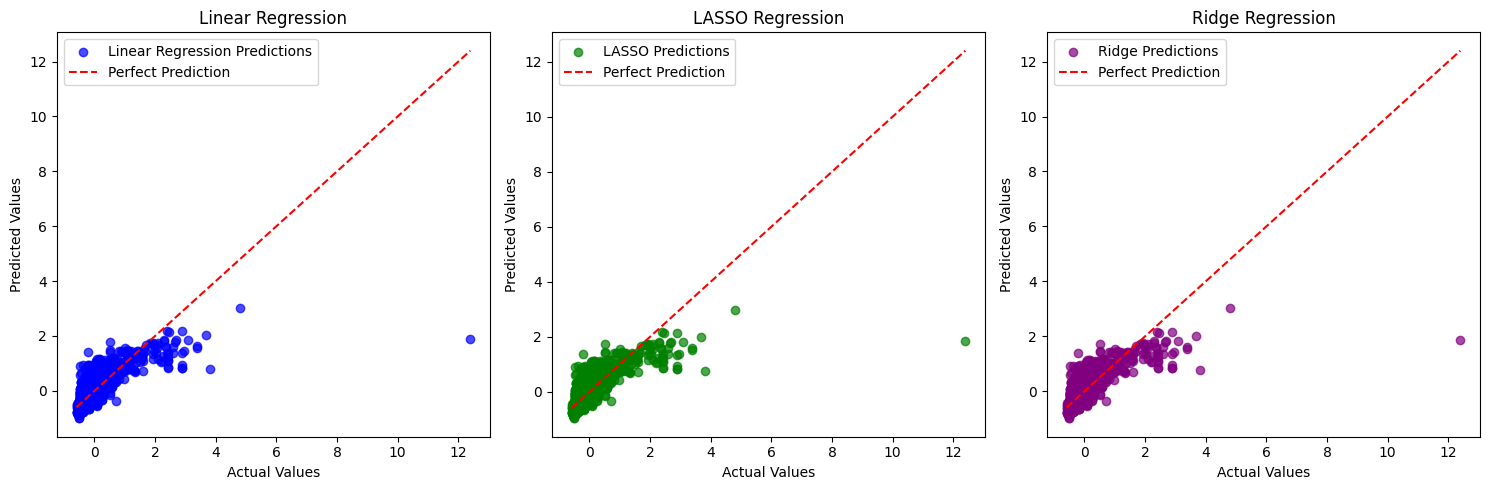

In [23]:
import matplotlib.pyplot as plt

# Plotting predictions vs actual values for Linear Regression, LASSO, and Ridge
plt.figure(figsize=(15, 5))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_val, y_pred_linear, alpha=0.7, color='blue', label='Linear Regression Predictions')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')
plt.legend()

# LASSO Regression
plt.subplot(1, 3, 2)
plt.scatter(y_val, y_pred_lasso, alpha=0.7, color='green', label='LASSO Predictions')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('LASSO Regression')
plt.legend()

# Ridge Regression
plt.subplot(1, 3, 3)
plt.scatter(y_val, y_pred_ridge, alpha=0.7, color='purple', label='Ridge Predictions')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression')
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


###Implementation of Closed-Form Linear Regression

In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to implement the closed-form solution for linear regression
def closed_form_solution(X, y):
    # Add bias/intercept column (column of ones)
    X_bias = np.c_[np.ones((X.shape[0], 1)), X]

    # Compute weights using the closed-form solution: w = (X^T X)^-1 X^T y
    w = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
    return w

# Predict using closed-form solution
def predict_closed_form(X, w):
    X_bias = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
    return X_bias @ w

# Train using the closed-form solution
w_closed = closed_form_solution(X_train_scaled, y_train)

# Predict on validation set
y_pred_closed_val = predict_closed_form(X_val_scaled, w_closed)

# Evaluate closed-form model
mse_closed = mean_squared_error(y_val, y_pred_closed_val)
mae_closed = mean_absolute_error(y_val, y_pred_closed_val)
r2_closed = r2_score(y_val, y_pred_closed_val)

print("Closed-Form Solution (Validation):")
print(f"R²: {r2_closed}, MSE: {mse_closed}, MAE: {mae_closed}")


Closed-Form Solution (Validation):
R²: 0.5796001161893852, MSE: 0.24251095797507966, MAE: 0.28339596655033455


###Implementation of Gradient Descent

In [29]:
# Function to implement gradient descent for linear regression
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    # Add bias term
    X_bias = np.c_[np.ones((X.shape[0], 1)), X]

    # Initialize weights
    n_features = X_bias.shape[1]
    w = np.zeros(n_features)

    # Perform gradient descent
    for _ in range(epochs):
        y_pred = X_bias @ w
        gradient = -(2 / len(y)) * X_bias.T @ (y - y_pred)
        w -= learning_rate * gradient

    return w

# Train using gradient descent
w_gradient = gradient_descent(X_train_scaled, y_train, learning_rate=0.01, epochs=1000)

# Predict on validation set
y_pred_gradient_val = predict_closed_form(X_val_scaled, w_gradient)  # Reuse predict_closed_form

# Evaluate gradient descent model
mse_gradient = mean_squared_error(y_val, y_pred_gradient_val)
mae_gradient = mean_absolute_error(y_val, y_pred_gradient_val)
r2_gradient = r2_score(y_val, y_pred_gradient_val)

print("Gradient Descent Solution (Validation):")
print(f"R²: {r2_gradient}, MSE: {mse_gradient}, MAE: {mae_gradient}")


Gradient Descent Solution (Validation):
R²: 0.5795666794849605, MSE: 0.24253024619930103, MAE: 0.2833902428096397


###Implementation of Feature Selection

In [30]:
def forward_feature_selection_closed_form(X_train, y_train, X_val, y_val):
    selected_features = []
    remaining_features = list(range(X_train.shape[1]))
    best_model = None
    best_score = float('inf')

    while remaining_features:
        best_feature = None

        for feature in remaining_features:
            # Temporarily add this feature to the model
            temp_features = selected_features + [feature]
            X_train_subset = X_train[:, temp_features]
            X_val_subset = X_val[:, temp_features]

            # Train closed-form model
            w = closed_form_solution(X_train_subset, y_train)

            # Predict on validation set
            y_pred_val = predict_closed_form(X_val_subset, w)

            # Calculate validation MSE
            mse = mean_squared_error(y_val, y_pred_val)

            # Track the best feature
            if mse < best_score:
                best_score = mse
                best_feature = feature
                best_model = w

        if best_feature is not None:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break

    return selected_features, best_model

# Perform feature selection
selected_features, best_w = forward_feature_selection_closed_form(
    X_train_scaled, y_train, X_val_scaled, y_val
)

print(f"Selected Features (Indices): {selected_features}")


Selected Features (Indices): [2, 3, 1, 6, 4, 0]


###compare the results and visualize the predictions using scatter plots

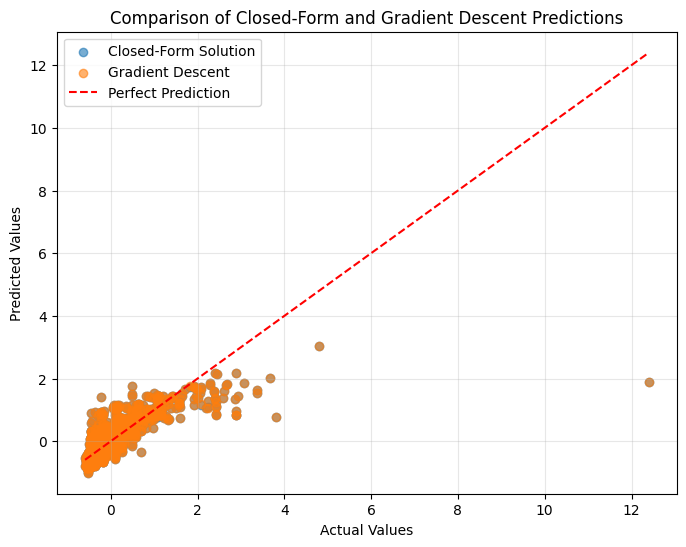

In [31]:
# Plot predictions of all models
plt.figure(figsize=(8, 6))

plt.scatter(y_val, y_pred_closed_val, label='Closed-Form Solution', alpha=0.6)
plt.scatter(y_val, y_pred_gradient_val, label='Gradient Descent', alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Closed-Form and Gradient Descent Predictions')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


##Non linear models

###Polynomial Regression (Degrees 2 to 10)

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a function to train polynomial regression models with different degrees
def polynomial_regression(X_train, y_train, X_val, y_val, degrees):
    polynomial_models = {}
    r2_scores = []  # List to store R² scores
    mse_scores = []  # List to store MSE scores
    mae_scores = []  # List to store MAE scores

    for degree in degrees:
        # Transform features to polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_poly_train = poly.fit_transform(X_train)
        X_poly_val = poly.transform(X_val)

        # Fit a linear regression model
        model = LinearRegression()
        model.fit(X_poly_train, y_train)

        # Make predictions on validation set
        y_pred_val = model.predict(X_poly_val)

        # Calculate metrics
        r2 = r2_score(y_val, y_pred_val)  # R²
        mse = mean_squared_error(y_val, y_pred_val)  # MSE
        mae = mean_absolute_error(y_val, y_pred_val)  # MAE

        # Store scores and models
        r2_scores.append((degree, r2))
        mse_scores.append((degree, mse))
        mae_scores.append((degree, mae))
        polynomial_models[degree] = model  # Store the model

    return polynomial_models, r2_scores, mse_scores, mae_scores

# Define polynomial degrees to evaluate
degrees = range(2, 11)

# Train polynomial regression models and calculate R², MSE, and MAE
poly_models, poly_r2_scores, poly_mse_scores, poly_mae_scores = polynomial_regression(
    X_train_scaled, y_train, X_val_scaled, y_val, degrees
)

# Display R², MSE, and MAE scores for each polynomial degree
print("Polynomial Regression Metrics on Validation Set:")
for degree, r2 in poly_r2_scores:
    mse = dict(poly_mse_scores).get(degree)
    mae = dict(poly_mae_scores).get(degree)
    print(f"Degree {degree}: R² = {r2:.4f}, MSE = {mse:.4f}, MAE = {mae:.4f}")


Polynomial Regression Metrics on Validation Set:
Degree 2: R² = 0.4947, MSE = 0.2915, MAE = 0.3170
Degree 3: R² = 0.6386, MSE = 0.2085, MAE = 0.2260
Degree 4: R² = -1011.1207, MSE = 583.8497, MAE = 1.9267
Degree 5: R² = -77498822.0797, MSE = 44705801.6683, MAE = 435.0272
Degree 6: R² = -6819106128998937.0000, MSE = 3933654654914809.0000, MAE = 2399818.9273
Degree 7: R² = -310558971830259.5000, MSE = 179148369603832.5000, MAE = 712515.8150
Degree 8: R² = -8401931992788.2900, MSE = 4846720122621.8652, MAE = 92937.1230
Degree 9: R² = -24767982452321.7930, MSE = 14287604214297.6055, MAE = 134243.3507
Degree 10: R² = -35845241079422.8438, MSE = 20677607410887.8398, MAE = 136143.5246


###Visualizations the polynomial regression( model predictions vs. actual values).

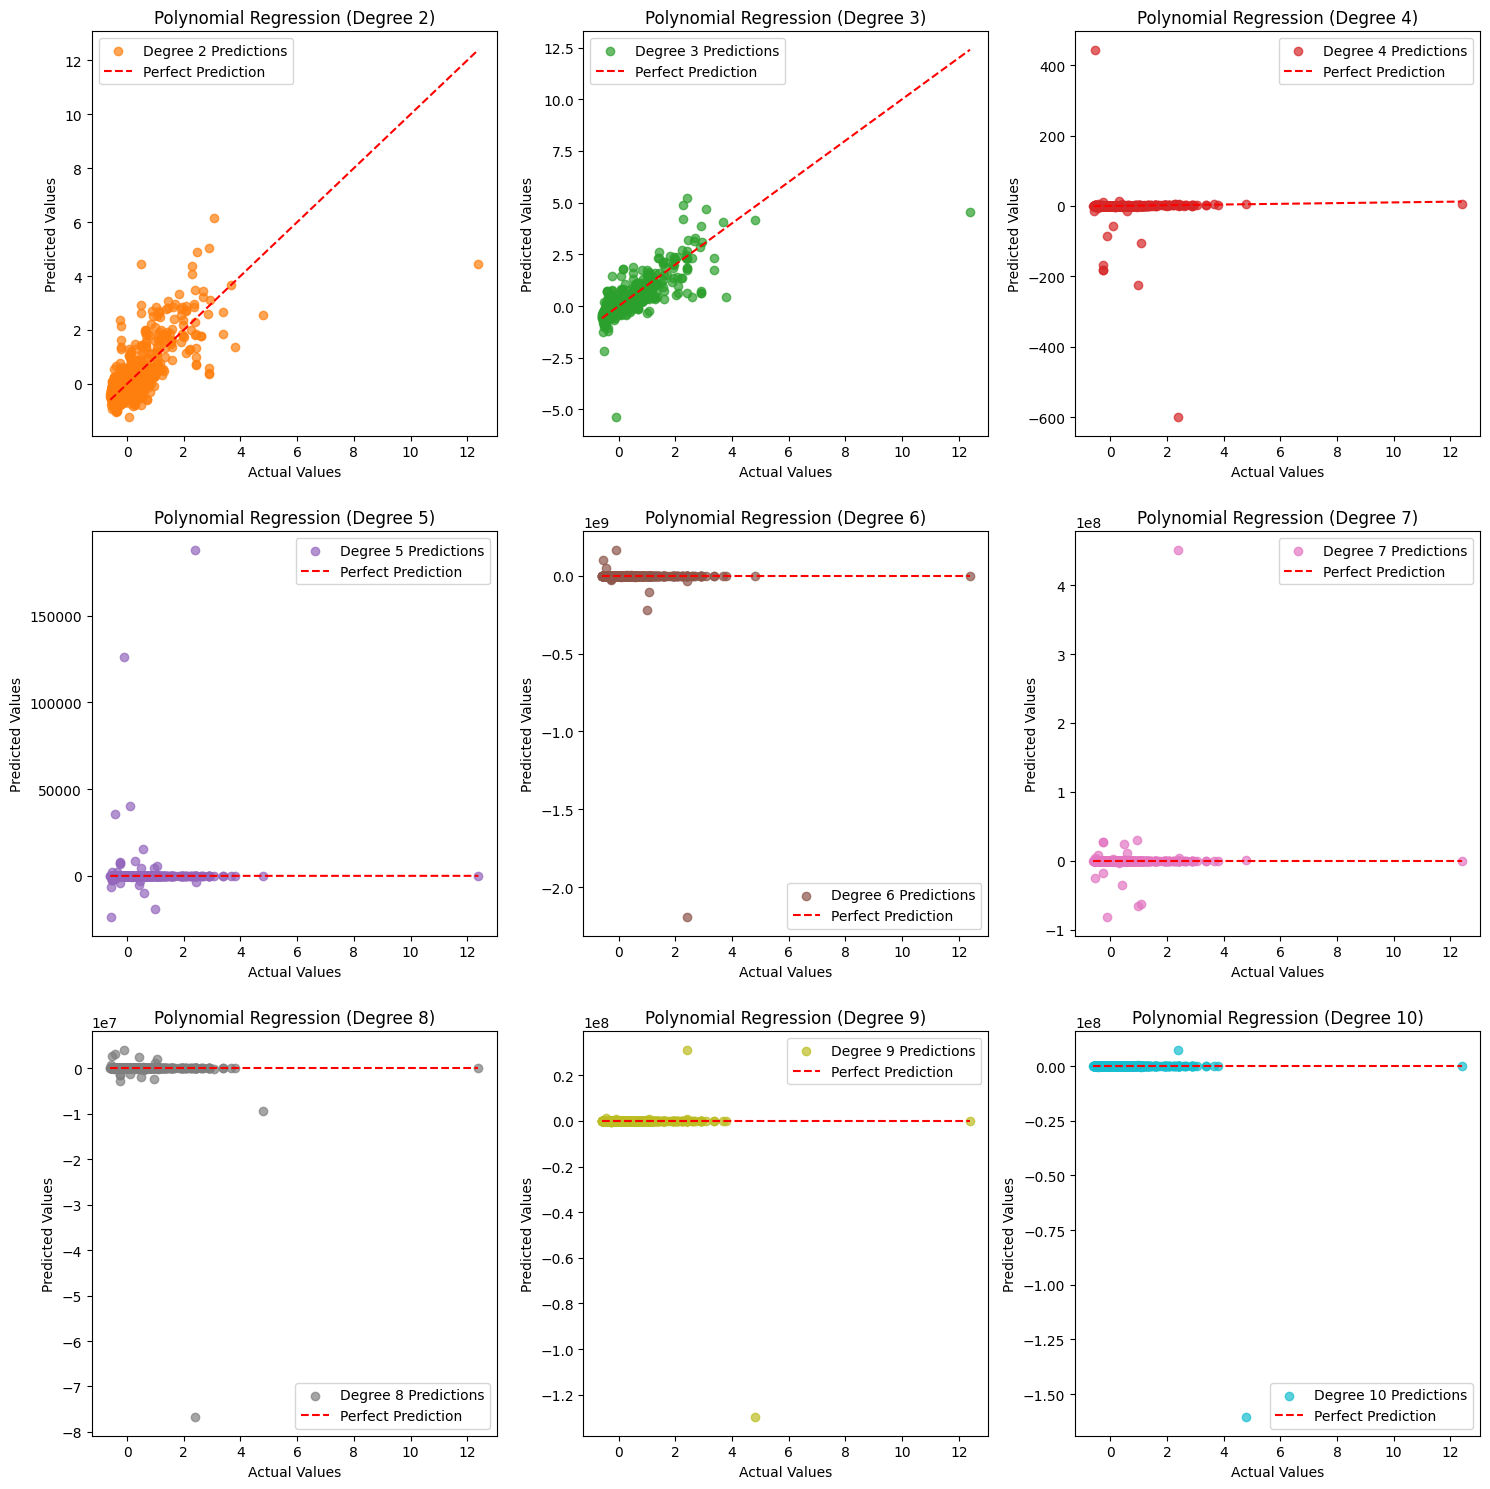

In [25]:
import matplotlib.pyplot as plt

# Plot predictions vs. actual values for Polynomial Regression models of varying degrees
plt.figure(figsize=(15, 15))

# Loop through the polynomial degrees and create subplots
for i, degree in enumerate(degrees, start=1):
    # Transform validation features using the current polynomial degree
    poly = PolynomialFeatures(degree=degree)
    X_poly_val = poly.fit_transform(X_val_scaled)

    # Predict using the corresponding model
    y_pred_poly = poly_models[degree].predict(X_poly_val)

    # Plot actual vs. predicted values
    plt.subplot(3, 3, i)  # Create a grid of subplots (3 rows, 3 columns)
    plt.scatter(y_val, y_pred_poly, alpha=0.7, label=f'Degree {degree} Predictions', color=f"C{i}")
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Perfect Prediction')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


###Radial Basis Function (RBF) Kernel Regression (SVR)

In [26]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to train and evaluate an RBF kernel regression model
def rbf_regression(X_train, y_train, X_val, y_val, C=1.0, epsilon=0.1):
    # Create and train the SVR model with RBF kernel
    svr_model = SVR(kernel='rbf', C=C, epsilon=epsilon)
    svr_model.fit(X_train, y_train)

    # Make predictions on validation set
    y_pred_val = svr_model.predict(X_val)

    # Calculate R² score
    r2 = r2_score(y_val, y_pred_val)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_val, y_pred_val)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_val, y_pred_val)

    return svr_model, r2, mse, mae

# Train RBF kernel regression and calculate R², MSE, and MAE
svr_model, svr_r2, svr_mse, svr_mae = rbf_regression(X_train_scaled, y_train, X_val_scaled, y_val)

# Display the R², MSE, and MAE scores for the RBF model
print(f"RBF Regression R² Score on Validation Set: {svr_r2}")
print(f"RBF Regression MSE on Validation Set: {svr_mse}")
print(f"RBF Regression MAE on Validation Set: {svr_mae}")


RBF Regression R² Score on Validation Set: 0.6747757783870858
RBF Regression MSE on Validation Set: 0.18760813353501693
RBF Regression MAE on Validation Set: 0.1904737796567862


###visualization

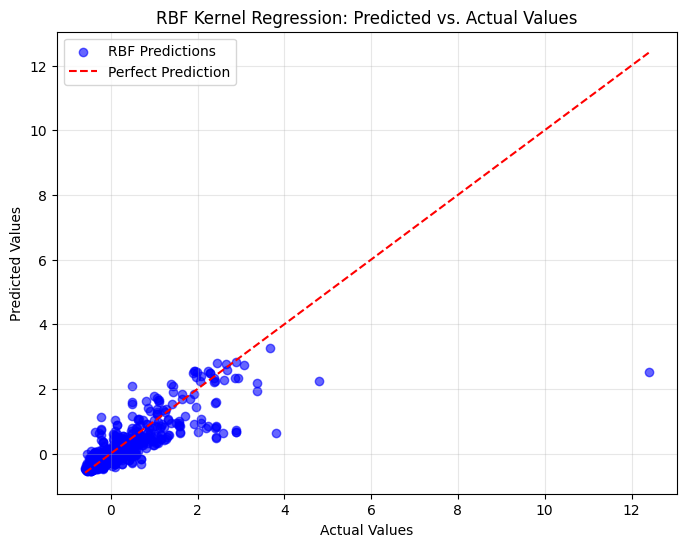

In [27]:
import matplotlib.pyplot as plt

# Predict validation set values
y_pred_val = svr_model.predict(X_val_scaled)

# Plot predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_val, color='blue', alpha=0.6, label='RBF Predictions')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label='Perfect Prediction')

plt.title('RBF Kernel Regression: Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


##Feature Selection with Forward Selection

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Function for forward feature selection
def forward_feature_selection(X_train, y_train, X_val, y_val, max_features=None):
    selected_features = []  # List to keep track of selected features
    remaining_features = list(X_train.columns)  # Features that are not yet selected
    best_model = None  # Store the best model
    best_score = float('inf')  # Initialize best score as infinity
    feature_scores = []  # To store scores at each step

    while remaining_features and (max_features is None or len(selected_features) < max_features):
        scores = {}

        # Try adding each remaining feature and evaluate performance
        for feature in remaining_features:
            # Temporarily include the feature in the model
            current_features = selected_features + [feature]
            X_train_subset = X_train[current_features]
            X_val_subset = X_val[current_features]

            # Train the model
            model = LinearRegression()
            model.fit(X_train_subset, y_train)

            # Predict and calculate MSE on the validation set
            y_pred_val = model.predict(X_val_subset)
            mse = mean_squared_error(y_val, y_pred_val)
            scores[feature] = mse

        # Select the feature with the best (lowest) MSE
        best_feature = min(scores, key=scores.get)
        best_score_for_feature = scores[best_feature]

        # Stop if no improvement
        if best_score_for_feature >= best_score:
            break

        # Update the best score, add the feature to the selected list, and remove it from remaining
        best_score = best_score_for_feature
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        feature_scores.append((best_feature, best_score))
        best_model = LinearRegression().fit(X_train[selected_features], y_train)  # Retrain the model

    return selected_features, best_model, feature_scores

# Apply forward selection
selected_features, best_model, feature_scores = forward_feature_selection(
    pd.DataFrame(X_train_scaled, columns=X_train.columns),
    y_train,
    pd.DataFrame(X_val_scaled, columns=X_train.columns),
    y_val
)

# Display the selected features and their performance
print("Selected Features (in order):", selected_features)
print("Feature Scores (MSE at each step):")
for feature, score in feature_scores:
    print(f"Feature: {feature}, Validation MSE: {score}")


Selected Features (in order): ['horse_power', 'top_speed', 'cylinder', 'country_encoded', 'seats', 'engine_capacity']
Feature Scores (MSE at each step):
Feature: horse_power, Validation MSE: 0.2908143458370722
Feature: top_speed, Validation MSE: 0.2432926091700604
Feature: cylinder, Validation MSE: 0.24130810574077377
Feature: country_encoded, Validation MSE: 0.24089879224045357
Feature: seats, Validation MSE: 0.2406929924238634
Feature: engine_capacity, Validation MSE: 0.2406839058678388


##Hyperparameter Tuning with Grid Search

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Define Grid Search for LASSO and Ridge Regression
lasso = Lasso()
ridge = Ridge()

param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}

# GridSearch for LASSO
lasso_grid = GridSearchCV(lasso, param_grid_lasso, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train_scaled, y_train)

# GridSearch for Ridge
ridge_grid = GridSearchCV(ridge, param_grid_ridge, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train_scaled, y_train)

# Display best parameters for LASSO and Ridge
print(f"Best LASSO alpha: {lasso_grid.best_params_['alpha']}")
print(f"Best Ridge alpha: {ridge_grid.best_params_['alpha']}\n")

# Polynomial Regression with Grid Search for degree
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

param_grid_poly = {'poly__degree': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
poly_grid = GridSearchCV(poly_pipeline, param_grid_poly, scoring='neg_mean_squared_error', cv=5)
poly_grid.fit(X_train_scaled, y_train)

print(f"Best Polynomial Degree: {poly_grid.best_params_['poly__degree']}\n")

# SVR with Grid Search for C and epsilon
svr = SVR(kernel='rbf')

param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1]
}

svr_grid = GridSearchCV(svr, param_grid_svr, scoring='neg_mean_squared_error', cv=5)
svr_grid.fit(X_train_scaled, y_train)

print(f"Best SVR parameters: {svr_grid.best_params_}\n")

# Evaluate the tuned models on the validation set
models = {
    'LASSO': lasso_grid.best_estimator_,
    'Ridge': ridge_grid.best_estimator_,
    'Polynomial Regression': poly_grid.best_estimator_,
    'SVR': svr_grid.best_estimator_
}

for name, model in models.items():
    y_pred_val = model.predict(X_val_scaled)
    mse = mean_squared_error(y_val, y_pred_val)
    r2 = r2_score(y_val, y_pred_val)
    print(f"{name} - Validation MSE: {mse}, Validation R²: {r2}")


Best LASSO alpha: 0.01
Best Ridge alpha: 100

Best Polynomial Degree: 2

Best SVR parameters: {'C': 100, 'epsilon': 0.1}

LASSO - Validation MSE: 0.24085863173419397, Validation R²: 0.5824644723631667
Ridge - Validation MSE: 0.24178397978124627, Validation R²: 0.5808603542865511
Polynomial Regression - Validation MSE: 0.291480462169101, Validation R²: 0.49471003928182755
SVR - Validation MSE: 0.14776380039793593, Validation R²: 0.7438471026736426
